In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/player_stats_men.csv')

In [4]:
df.head()

,Unnamed: 0,S.NO,PLAYER NAME,JERSEY NO.,CLUB,Position,Height,Weight,NO. OF GAME PLAYED,TOTAL SCORE,...,FREE THROW ATTEMPT,FREE THROW MADE,FREE THROW ACCURACY %,EFFICIENCY,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,4,1,Karma Gurung,8,GGIC,Shooting Guard,5'11,86.0,14,38,...,12,6,50,2.071429,75.0,46.0,29.0,14.0,NaN,NaN
1,5,2,Chiranjivi Rokaya,35,GGIC,Small Forward,5'11,66.0,14,11,...,8,1,12.5,0.571429,22.0,14.0,8.0,14.0,NaN,NaN
2,6,3,Rajiv Joshi,7,GGIC,Guard,5'10,76.0,14,112,...,22,18,81.81818182,8.000000,182.0,70.0,112.0,14.0,NaN,NaN
3,7,4,Binod Shrestha,3,GGIC,Gaurd,5'8,78.0,14,116,...,6,4,66.66666667,5.357143,161.0,86.0,75.0,14.0,NaN,NaN
4,8,5,Kabindra Pradhan,1,GGIC,Small Forward,6'0,69.0,14,41,...,15,7,46.66666667,3.571429,81.0,31.0,50.0,14.0,NaN,NaN


In [5]:
df.columns

Index(['Unnamed: 0', 'S.NO', 'PLAYER NAME', 'JERSEY NO.', 'CLUB', 'Position',
       'Height', 'Weight', 'NO. OF GAME PLAYED', 'TOTAL SCORE',
       'AVR. SCORE PER GAME', 'FOULS', 'TECHNICAL', 'BLOCK', 'TOTAL ASSIST',
       'AVR. ASSIST PER GAME', 'TOTAL REBOUND', 'AVR. REBOUND PER GAME',
       'STEAL', 'TOTAL TURN OVER', 'AVR. TURNOVER PER GAME',
       '3 POINTS ATTEMPT', '3 POINTS MADE', '3 PA %', '2 POINT ATTEMPT',
       '2 POINT MADE', '2 PA %', 'FIELD GOALS ATTEMPT', 'FIELD GOALS MADE',
       'FIELD GOAL %', 'FREE THROW ATTEMPT', 'FREE THROW MADE',
       'FREE THROW ACCURACY %', 'EFFICIENCY', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

In [7]:
clubs = df['CLUB'].unique()

clubs

array(['GGIC', 'TAC', 'NPC', 'TTIC', 'BMBC', 'AKBT', 'SSBC', 'RBC'],
      dtype=object)

In [16]:
columns_of_interest = ['TOTAL SCORE',
       'FOULS', 'TECHNICAL', 'BLOCK', 'TOTAL ASSIST',
       'TOTAL REBOUND',
       'STEAL', 'TOTAL TURN OVER',
       '3 POINTS ATTEMPT', '3 POINTS MADE', '2 POINT ATTEMPT',
       '2 POINT MADE', 'FIELD GOALS ATTEMPT', 'FIELD GOALS MADE',
       'FREE THROW ATTEMPT', 'FREE THROW MADE',
       ]


In [33]:
clubs_df = []

for club in clubs:
    data_obj = {'CLUBS': club}
    club_data = df.loc[df['CLUB'] == club]
    for col in columns_of_interest:
        value = "{:.2f}".format(club_data[col].astype(float).sum() / 14)
        data_obj[col] = value

    data_obj['3 PA %'] = club_data['3 POINTS MADE'].astype(float).sum() * 100 / club_data['3 POINTS ATTEMPT'].astype(float).sum()
    data_obj['2 PA %'] = club_data['2 POINT MADE'].astype(float).sum() * 100 / club_data['2 POINT ATTEMPT'].astype(float).sum()
    data_obj['FREE THROW ACCURACY %'] = club_data['FREE THROW MADE'].astype(float).sum() * 100 / club_data['FREE THROW ATTEMPT'].astype(float).sum()
    data_obj['TOTAL 3 POINTS ATTEMPT'] = club_data['3 POINTS ATTEMPT'].astype(float).sum()
    data_obj['TOTAL 2 POINTS ATTEMPT'] = club_data['2 POINT ATTEMPT'].astype(float).sum()
    data_obj['TOTAL FT ATTEMPT'] = club_data['FREE THROW ATTEMPT'].astype(float).sum()
    
    clubs_df.append(data_obj)

clubs_df = pd.DataFrame(clubs_df)

clubs_df

,CLUBS,TOTAL SCORE,FOULS,TECHNICAL,BLOCK,TOTAL ASSIST,TOTAL REBOUND,STEAL,TOTAL TURN OVER,3 POINTS ATTEMPT,...,FIELD GOALS ATTEMPT,FIELD GOALS MADE,FREE THROW ATTEMPT,FREE THROW MADE,3 PA %,2 PA %,FREE THROW ACCURACY %,TOTAL 3 POINTS ATTEMPT,TOTAL 2 POINTS ATTEMPT,TOTAL FT ATTEMPT
0,GGIC,57.14,0.00,0.07,1.64,11.50,33.21,6.64,10.29,18.00,...,59.57,25.14,13.71,7.21,28.571429,48.109966,52.604167,252.0,582.0,192.0
1,TAC,88.86,2.57,0.00,2.86,15.71,36.64,8.29,13.07,22.29,...,72.64,36.86,16.00,9.64,35.897436,57.304965,60.267857,312.0,705.0,224.0
2,NPC,79.86,4.57,0.07,3.50,13.07,38.21,7.14,15.79,17.14,...,63.43,29.57,17.07,9.21,29.166667,53.086420,53.974895,240.0,648.0,239.0
3,TTIC,78.14,4.00,0.29,3.86,12.64,41.86,5.93,13.71,18.36,...,64.93,28.64,17.71,10.57,30.350195,49.539877,59.677419,257.0,652.0,248.0
4,BMBC,70.14,1.71,0.00,2.86,9.36,31.64,8.50,13.29,14.43,...,63.36,25.57,15.00,8.43,26.237624,44.525547,56.190476,202.0,685.0,210.0
5,AKBT,48.93,3.36,0.00,2.21,6.43,22.93,6.50,13.00,14.57,...,48.57,18.50,11.64,8.21,24.509804,43.907563,70.552147,204.0,476.0,163.0
6,SSBC,51.50,5.57,0.00,2.79,9.36,32.57,8.29,14.21,22.57,...,62.79,20.29,21.36,13.57,19.620253,39.431616,63.545151,316.0,563.0,299.0
7,RBC,38.71,3.50,0.00,1.57,6.07,16.14,5.79,7.93,11.50,...,37.64,14.64,6.29,4.50,26.086957,44.535519,71.590909,161.0,366.0,88.0


In [34]:
clubs_df.to_csv('../data/teams.csv')

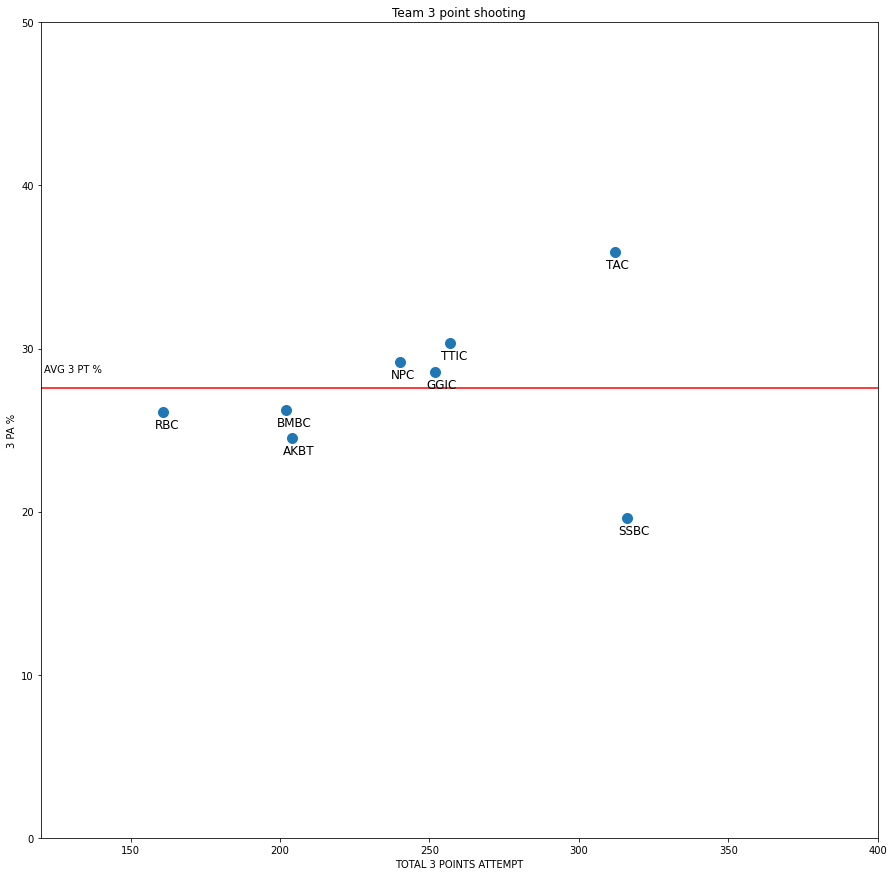

In [52]:
three_pt_shooting = pd.concat([clubs_df['3 PA %'].astype(float), clubs_df['TOTAL 3 POINTS ATTEMPT'], clubs_df['CLUBS']], axis=1)
ax = three_pt_shooting.plot.scatter(x='TOTAL 3 POINTS ATTEMPT', y='3 PA %', ylim=(0,50), xlim=(120,400), figsize=(15, 15), s=100)

for i, point in three_pt_shooting.iterrows():
        ax.text(point['TOTAL 3 POINTS ATTEMPT'] - 3, point['3 PA %'] - 1, str(point['CLUBS']), fontsize=12)

mean = three_pt_shooting['3 PA %'].describe()['mean']
ax.axline((0, mean), (100, mean), c='r')
ax.text(121, mean + 1, 'AVG 3 PT %')
ax.set_title('Team 3 point shooting')

fig = ax.get_figure()

fig.savefig("../images/TEAM 3 point shooting.jpg")

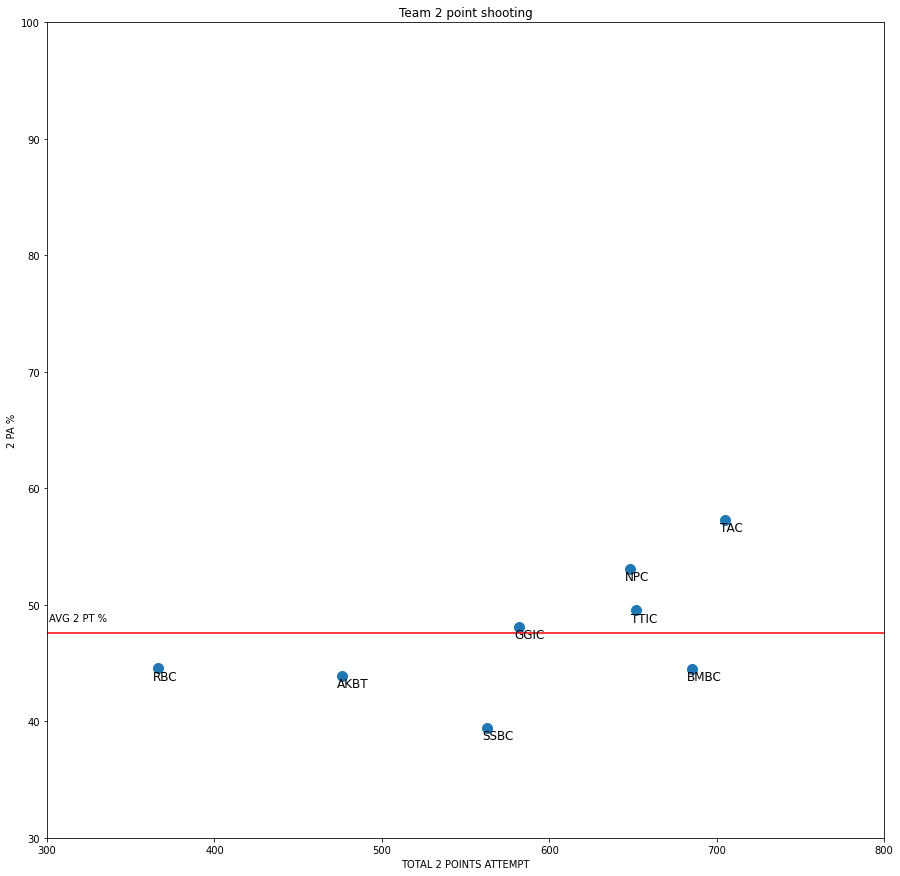

In [55]:
two_pt_shooting = pd.concat([clubs_df['2 PA %'].astype(float), clubs_df['TOTAL 2 POINTS ATTEMPT'], clubs_df['CLUBS']], axis=1)
ax = two_pt_shooting.plot.scatter(x='TOTAL 2 POINTS ATTEMPT', y='2 PA %', ylim=(30,100), xlim=(300,800), figsize=(15, 15), s=100)

for i, point in two_pt_shooting.iterrows():
        ax.text(point['TOTAL 2 POINTS ATTEMPT'] - 3, point['2 PA %'] - 2, str(point['CLUBS']), fontsize=12)

mean = two_pt_shooting['2 PA %'].describe()['mean']
ax.axline((0, mean), (100, mean), c='r')
ax.text(301, mean + 1, 'AVG 2 PT %')
ax.set_title('Team 2 point shooting')

fig = ax.get_figure()

fig.savefig("../images/TEAM 2 point shooting.jpg")

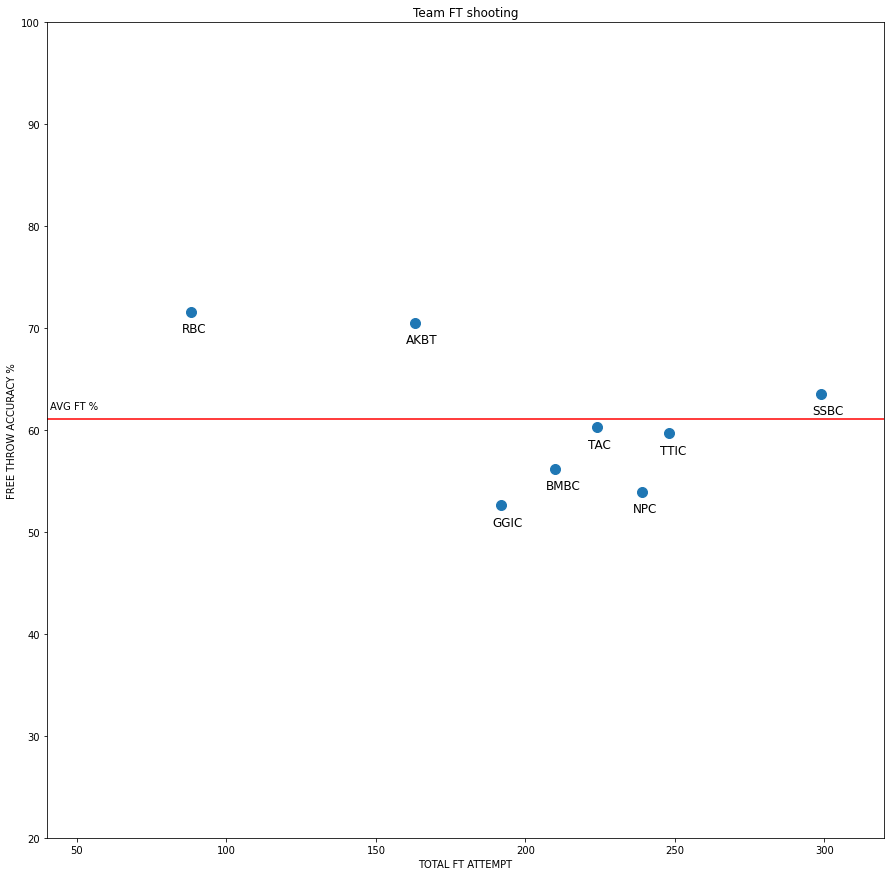

In [59]:
ft_shooting = pd.concat([clubs_df['FREE THROW ACCURACY %'].astype(float), clubs_df['TOTAL FT ATTEMPT'], clubs_df['CLUBS']], axis=1)
ax = ft_shooting.plot.scatter(x='TOTAL FT ATTEMPT', y='FREE THROW ACCURACY %', ylim=(20,100), xlim=(40,320), figsize=(15, 15), s=100)

for i, point in ft_shooting.iterrows():
        ax.text(point['TOTAL FT ATTEMPT'] - 3, point['FREE THROW ACCURACY %'] - 2, str(point['CLUBS']), fontsize=12)

mean = ft_shooting['FREE THROW ACCURACY %'].describe()['mean']
ax.axline((0, mean), (100, mean), c='r')
ax.text(41, mean + 1, 'AVG FT %')
ax.set_title('Team FT shooting')

fig = ax.get_figure()

fig.savefig("../images/TEAM FT shooting.jpg")

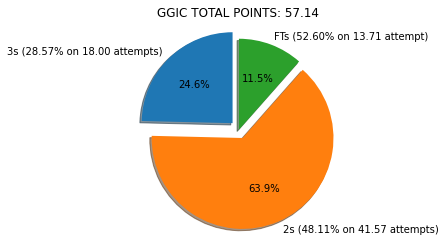

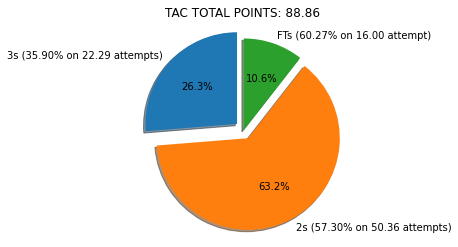

<ipython-input-75-b1ca3ac3049d>:14: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',


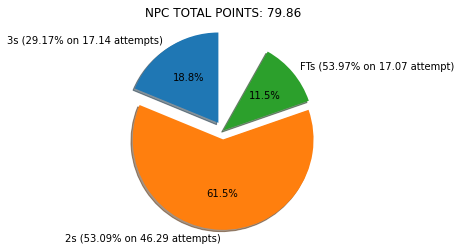

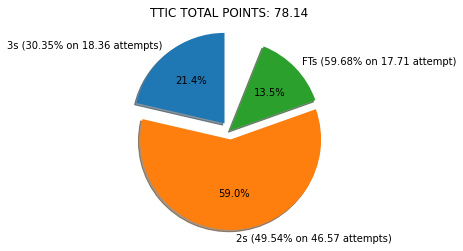

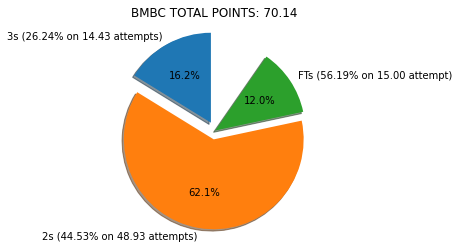

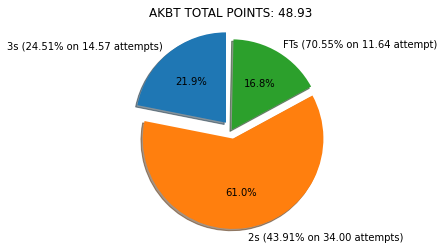

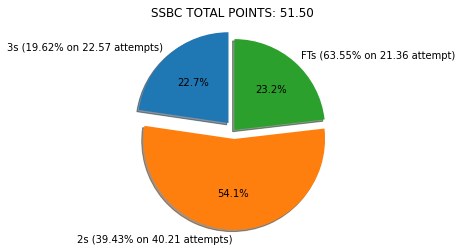

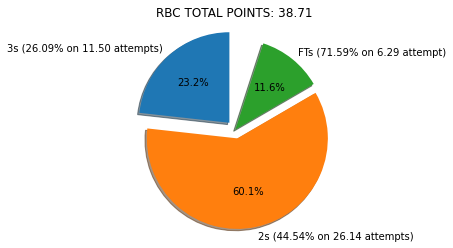

In [75]:
for _, club in clubs_df.iterrows():
    total_points = float(club['TOTAL SCORE'])
    three_percentage = float(club['3 POINTS MADE']) * 3 / total_points
    two_percentage = float(club['2 POINT MADE']) * 2 / total_points
    ft_percentage = float(club['FREE THROW MADE']) / total_points
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = '3s ({}% on {} attempts)'.format("{:.2f}".format(float(club['3 PA %'])), club['3 POINTS ATTEMPT']), '2s ({}% on {} attempts)'.format("{:.2f}".format(float(club['2 PA %'])), club['2 POINT ATTEMPT']), 'FTs ({}% on {} attempt)'.format("{:.2f}".format(float(club['FREE THROW ACCURACY %'])), club['FREE THROW ATTEMPT'])
    
    sizes = [three_percentage, two_percentage, ft_percentage]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(club['CLUBS'] + ' TOTAL POINTS: {}'.format(club['TOTAL SCORE']))
    plt.savefig('../images/team_scoring_pie_{}.jpg'.format(['CLUBS']))
    plt.show()